# The Sparks Foundation - Grip Nov'22
## Data Science and Business Analytics Intern
## Author : Owais Ali
## Task 3: As a Business Manager, try to find out the weak areas where you can work to make more profit. (Exploratory Data Analysis)

### Dataset Link : https://drive.google.com/file/d/1lV7is1B566UQPYzzY8R2ZmOritTW299S/view

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
# checking the info of the Data (total column and there data types) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
df.shape             # rows and columns of Dataset

(9994, 13)

In [5]:
# checking for null values

df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
# Unique values
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [7]:
# Now we have to remove irrelevent columns from our Datasets 

# getting unique values of each column seperately
for column in df.columns[:]:
    print("-" * 40)
    print(column , ": \n", df[column].unique(),)


----------------------------------------
Ship Mode : 
 ['Second Class' 'Standard Class' 'First Class' 'Same Day']
----------------------------------------
Segment : 
 ['Consumer' 'Corporate' 'Home Office']
----------------------------------------
Country : 
 ['United States']
----------------------------------------
City : 
 ['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 

In [8]:
# as we can see country column has only one attribute (United States)
# Postal code column contains the same value for region state so it seems to be irrelevent


In [9]:
# We will drop the Country and Postal Code Column
df.drop(["Country", "Postal Code"], axis=1, inplace=True)



In [10]:
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   City          9994 non-null   object 
 3   State         9994 non-null   object 
 4   Region        9994 non-null   object 
 5   Category      9994 non-null   object 
 6   Sub-Category  9994 non-null   object 
 7   Sales         9994 non-null   float64
 8   Quantity      9994 non-null   int64  
 9   Discount      9994 non-null   float64
 10  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 859.0+ KB


In [12]:
df.shape

(9994, 11)

In [13]:
# Now we will drop the duplicated results

df.drop_duplicates()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


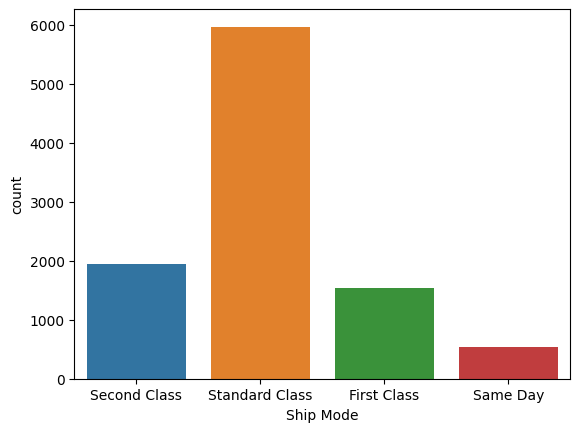

In [14]:
# Univariate Analysis
sns.countplot(data=df, x='Ship Mode')
plt.show()

In [15]:
# As we can see most of people prefer to choose Standard Class

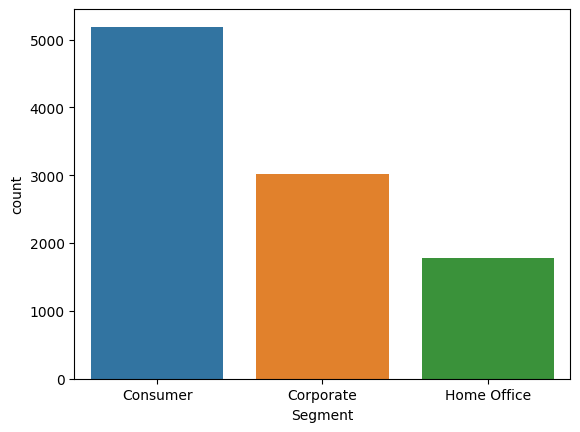

In [16]:
sns.countplot(data=df, x='Segment')
plt.show()

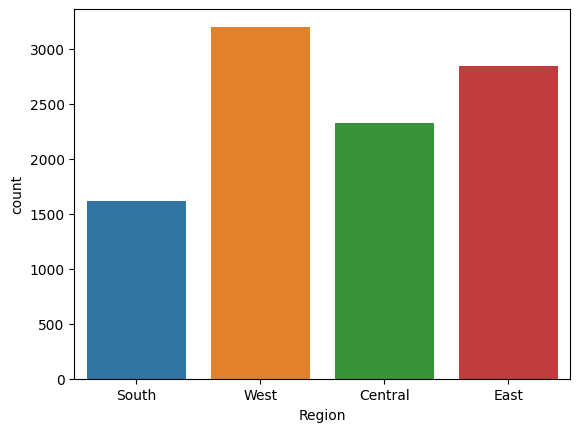

In [17]:
sns.countplot(data=df, x='Region')
plt.show()

In [18]:
# Most of people count from West followed by East and Central

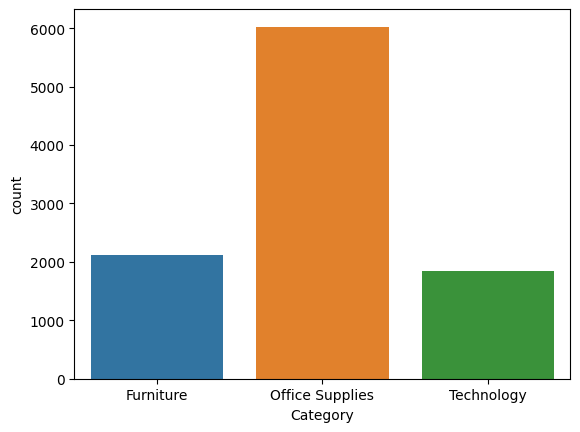

In [19]:
sns.countplot(data=df, x='Category')
plt.show()

In [20]:
# Maximum Supply is from Office Supplies

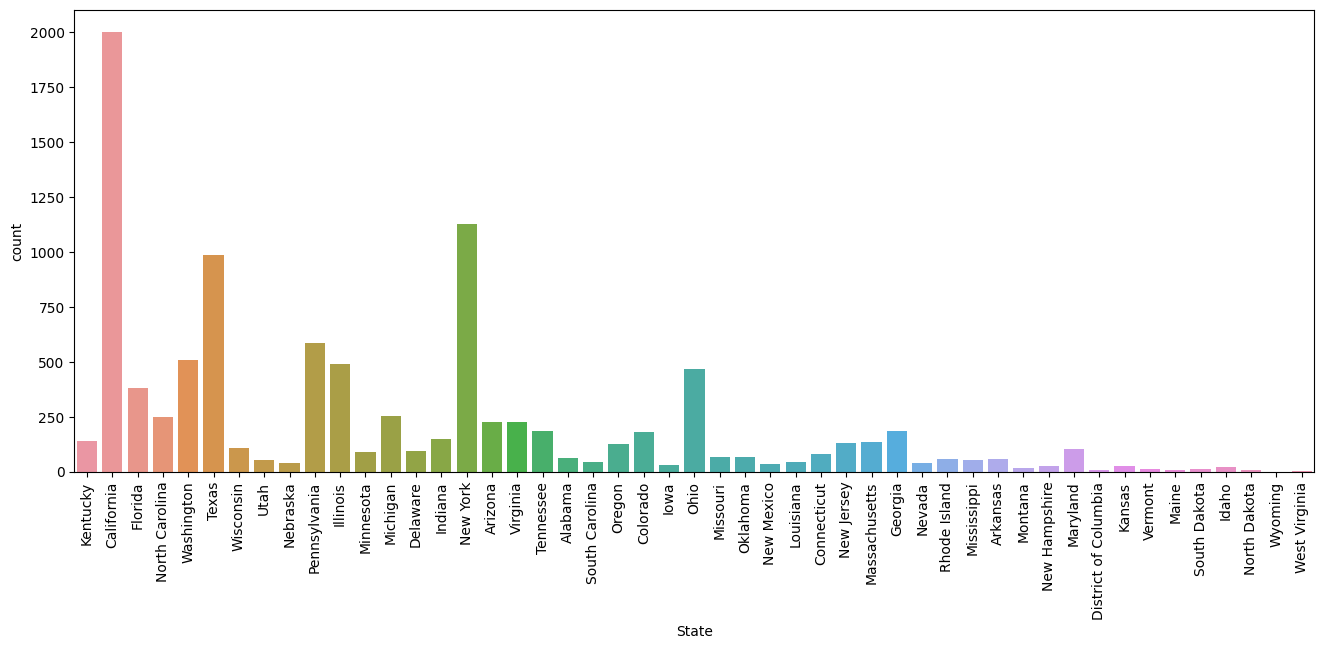

In [21]:
plt.figure(figsize=[16,6]) # to increase the dimensions of the graph
sns.countplot(data=df, x='State')
plt.xticks(rotation = 90)    # to plot names vertically
plt.show()

In [22]:
state_data = df['State'].value_counts()
state_data

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

In [23]:
# California having highest count


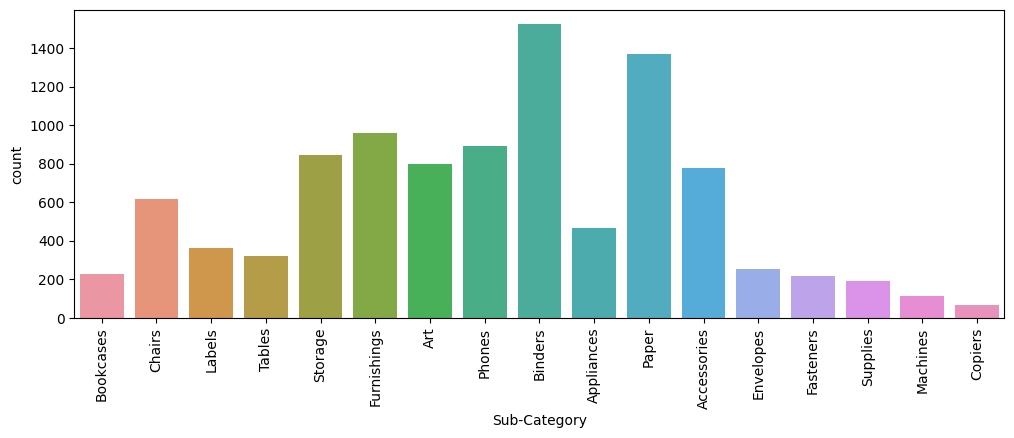

In [24]:
plt.figure(figsize=[12,4]) # to increase the dimensions of the graph
sns.countplot(data=df, x='Sub-Category')
plt.xticks(rotation = 90)    # to plot names vertically
plt.show()

In [25]:
# Maximum sales is from Binders followed by Paper

# Checking Profit Column

<AxesSubplot: >

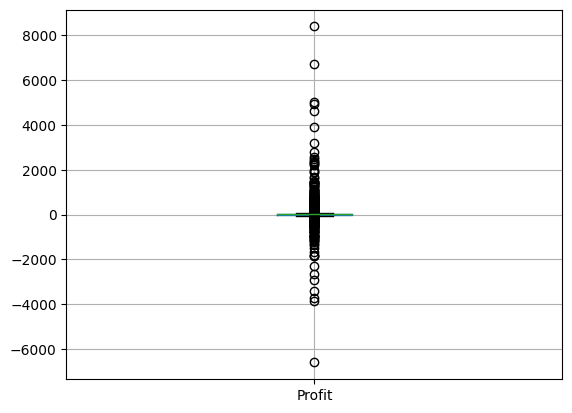

In [26]:
df.boxplot(column = ['Profit'])

In [27]:
# As we can see profit column contains so many Outliers

In [28]:
df['Profit'].describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

In [29]:
print(df['Profit'].skew())

7.561431562468343


C:\Users\Owais\AppData\Local\Temp\ipykernel_6376\1218682254.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Profit'], hist=True)


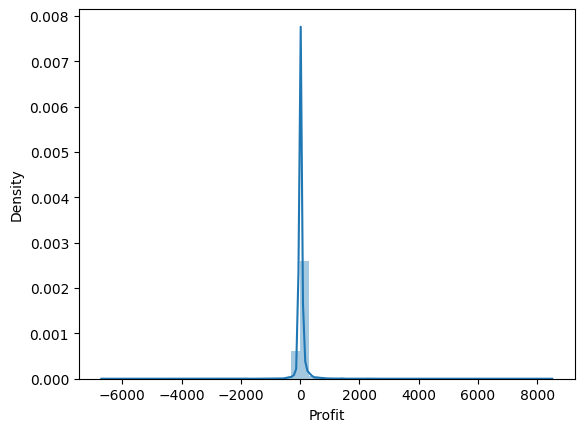

In [30]:
sns.distplot(df['Profit'], hist=True)
plt.show()

In [31]:
# Skewness usually lies in between +1 to -1 , but in this column skewness is +7.561,
#  which clearly shows the data is highly skewed to the right side.

# Now, before applying Square root to the Profit column we will check the correlation first.


C:\Users\Owais\AppData\Local\Temp\ipykernel_6376\221941791.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


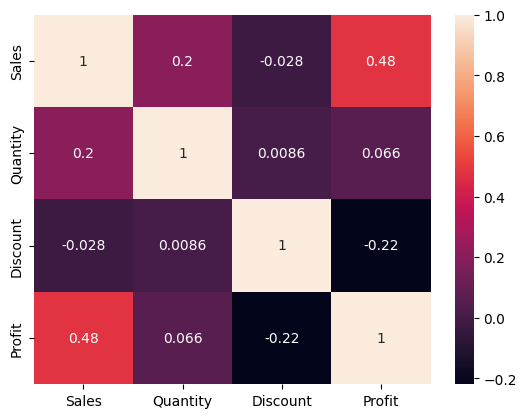

In [32]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [33]:
# Handling rightly skewed data
# we will try to keep values in between 10th and 90th percentile in profit column 

In [34]:
print(df['Profit'].quantile(.10))
print(df['Profit'].quantile(.90))

-15.47346
89.28162000000006


In [35]:
df['Profit'] = np.where(df['Profit'] <--15.47346 , -15.47346 , df['Profit'] )
df['Profit'] = np.where(df['Profit'] >89.28162000000006 , 89.28162000000006 , df['Profit'] )
print( df['Profit'].skew() )

1.150340143450281


In [36]:
# Now Skewness is reduced for Profit Column

# Checking Sales Column

<AxesSubplot: >

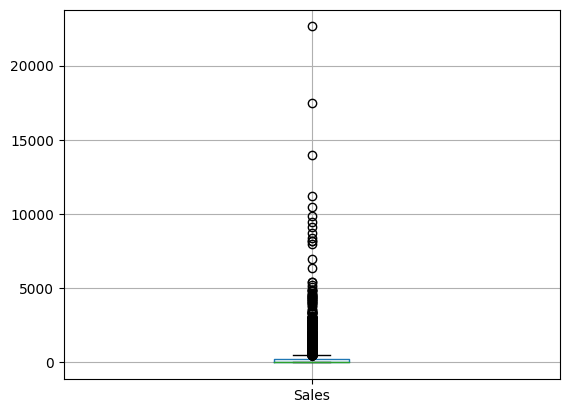

In [37]:
df.boxplot(column=['Sales'])

In [38]:
df['Sales'].describe

<bound method NDFrame.describe of 0       261.9600
1       731.9400
2        14.6200
3       957.5775
4        22.3680
          ...   
9989     25.2480
9990     91.9600
9991    258.5760
9992     29.6000
9993    243.1600
Name: Sales, Length: 9994, dtype: float64>

C:\Users\Owais\AppData\Local\Temp\ipykernel_6376\4270553142.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales'], hist=True)


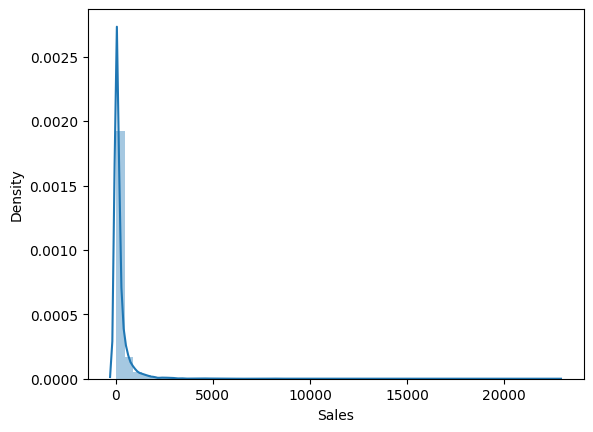

In [39]:
sns.distplot(df['Sales'], hist=True)
plt.show()

In [40]:
print(df['Sales'].skew())

12.97275234181623


C:\Users\Owais\AppData\Local\Temp\ipykernel_6376\221941791.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


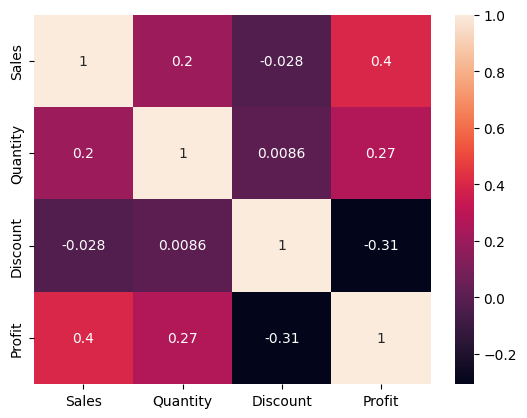

In [41]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [42]:
print(df['Sales'].quantile(.10))
print(df['Sales'].quantile(.90))

7.897200000000001
572.7060000000001


In [43]:
# Removing extreme values to correct skewness
df['Sales'] = np.where(df['Sales'] <-7.897200000000001 , 7.897200000000001 , df['Sales'] )
df['Sales'] = np.where(df['Sales'] >572.7060000000001 , 572.7060000000001 , df['Sales'] )
print( df['Sales'].skew() )

1.3559764251972817


C:\Users\Owais\AppData\Local\Temp\ipykernel_6376\3202717142.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


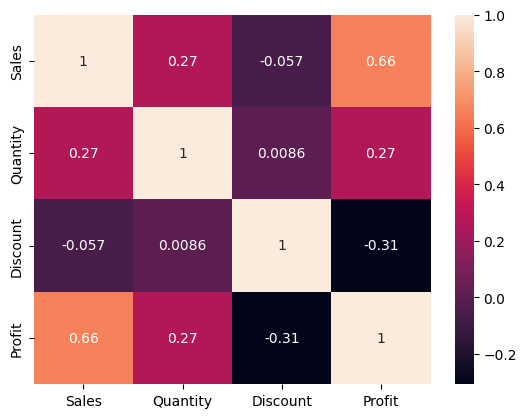

In [44]:
sns.heatmap(df.corr(), annot=True)

plt.show()

## "Evaluation:"
### 1: Correlation between Sales and Quantity with respect to Profit improved after removing the extreme values of the column
### 2: Positive Correlation between Sales and Profit.
### 3: Positive Correlation between Quantity and Profit
### 4: Negative Correlation between Discount and Profit

# Analysis each attribute with respect to Sales , Profit and Discount

In [45]:
# Analysis associated with Shipment mode

In [46]:
ship_count = df['Ship Mode'].value_counts().sort_index()
ship_count

First Class       1538
Same Day           543
Second Class      1945
Standard Class    5968
Name: Ship Mode, dtype: int64

In [47]:
data_ship = df.groupby(['Ship Mode'])[["Sales", "Discount", "Profit"]].mean()
data_ship

,Sales,Discount,Profit
Ship Mode,,,
First Class,146.770951,0.164610,9.384626
Same Day,150.420856,0.152394,10.571825
Second Class,152.019039,0.138895,11.201788
Standard Class,147.264768,0.160023,9.335246


In [48]:
# 1: Sales and Profit are more in Second Class with least discount
# 2: Sales and Profit are least in First Class with more discount  

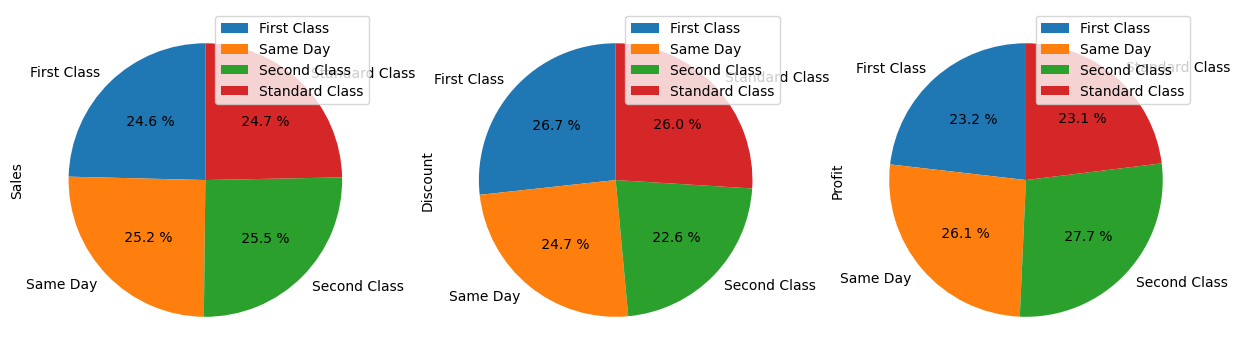

In [49]:
data_ship.plot.pie(subplots=True , figsize=(15,20), autopct= "% 1.1f %%" , startangle = 90)
plt.show()

In [50]:
# Analysis associated with Segment

In [51]:
seg = df["Segment"].value_counts().sort_index()
seg

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

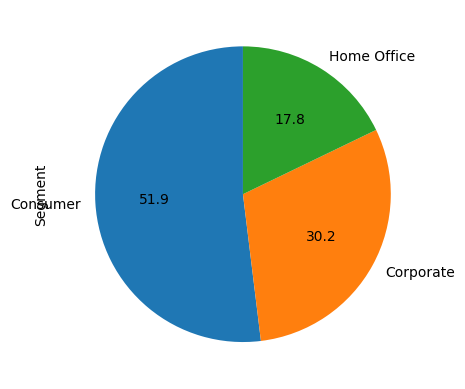

In [52]:
seg.plot.pie(subplots=True, autopct= "%1.1f", startangle=90)
plt.show()

In [53]:
data_seg = df.groupby( ["Segment"])[["Sales", "Discount", "Profit"]].mean()
data_seg

,Sales,Discount,Profit
Segment,,,
Consumer,146.145855,0.158141,9.137196
Corporate,151.432576,0.158228,10.186834
Home Office,149.184467,0.147128,10.924768


In [54]:
# Profit is more in Home office with a least discount
# Sales is more in Corporate

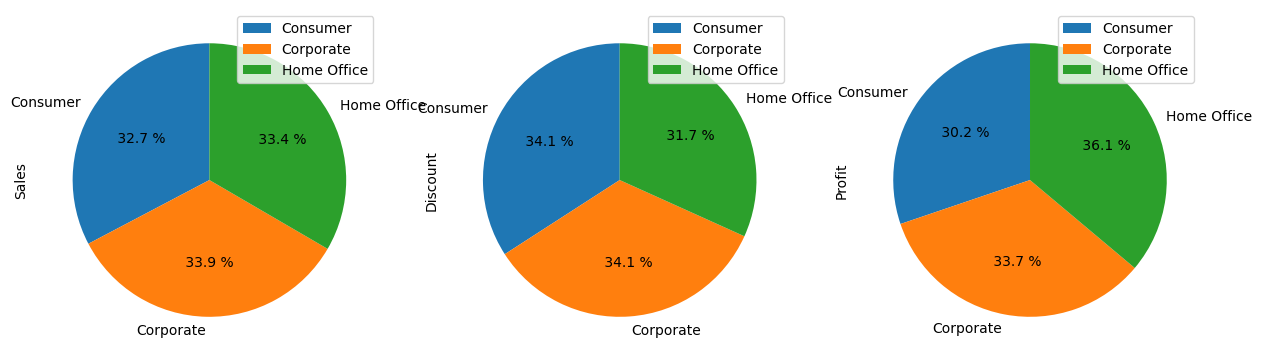

In [55]:
data_seg.plot.pie(subplots=True , figsize=(15,20), autopct= "% 1.1f %%" , startangle = 90)
plt.show()

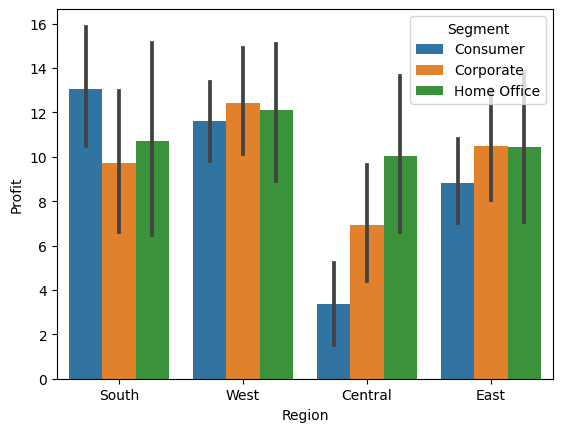

In [56]:
sns.barplot(data = df, x="Region", y="Profit", hue="Segment")
plt.show()

In [57]:
# Central region has least number of consumers

## Analysis of City

In [58]:
city = df["City"].value_counts()
city

New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64

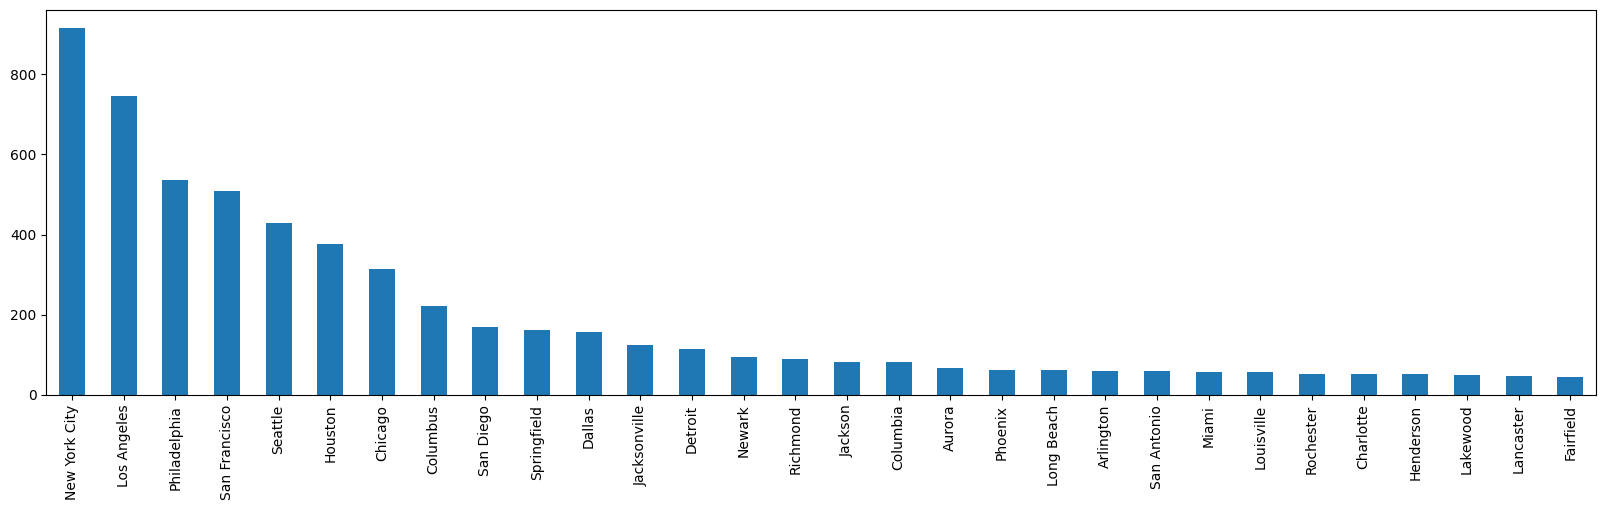

In [59]:
city.head(30).plot(kind= "bar", figsize=(20,5))
plt.show()

In [60]:
print(f"The Average number of deals per city is {round(city.mean())}" )

The Average number of deals per city is 19


In [61]:
data_city = df.groupby(["City"])[["Sales", "Discount" , "Profit"]].mean()
data_city = data_city.sort_values("Profit", ascending = False)
data_city

,Sales,Discount,Profit
City,,,
Murrieta,484.650000,0.000000,89.28162
Cheyenne,572.706000,0.200000,89.28162
Missoula,487.984000,0.200000,89.28162
Independence,572.706000,0.000000,89.28162
Saint Peters,572.706000,0.000000,89.28162
...,...,...,...
Highland Park,242.053143,0.414286,-15.47346
Hillsboro,21.959500,0.325000,-15.47346
Hoover,131.462500,0.000000,-15.47346


In [62]:
data_city.describe()

,Sales,Discount,Profit
count,531.000000,531.000000,531.000000
mean,142.662029,0.147103,10.779102
std,98.459770,0.169456,23.012719
min,1.392000,0.000000,-15.473460
25%,75.170714,0.000000,-7.410411
50%,129.283500,0.075000,8.225605
75%,191.740190,0.260000,23.142746
max,572.706000,0.800000,89.281620


In [63]:
state = df["State"].value_counts()
state

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

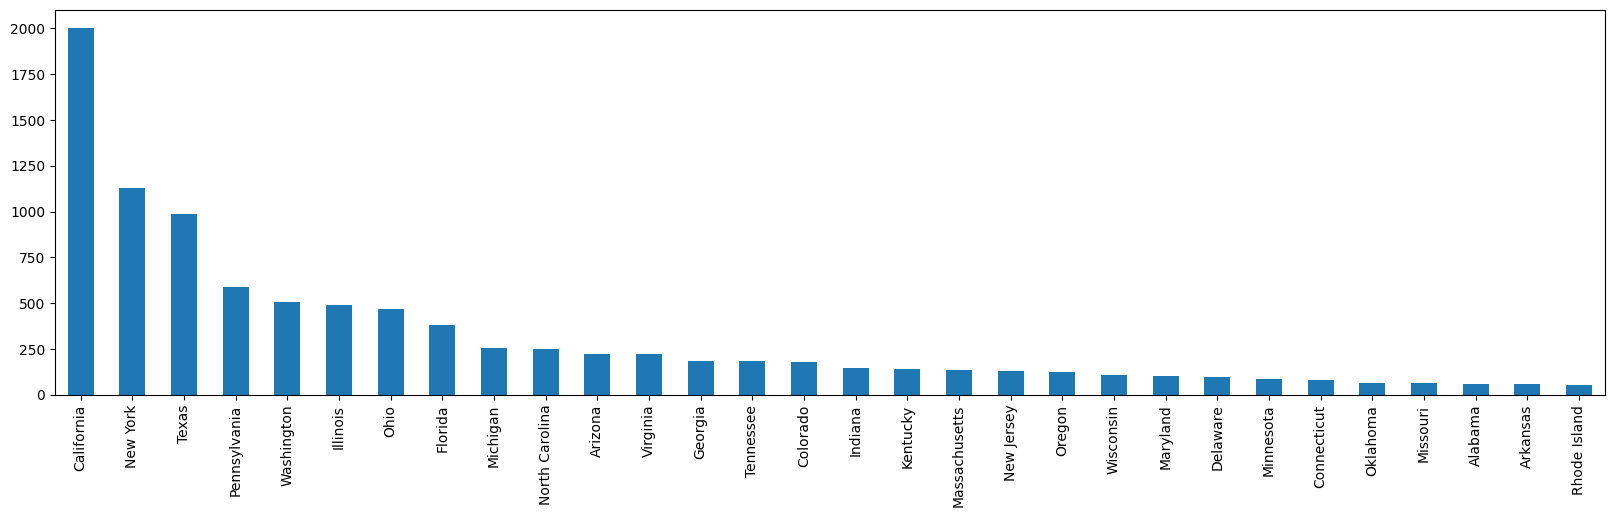

In [64]:
state.head(30).plot(kind= "bar", figsize=(20,5))
plt.show()

In [65]:
print(f"The Average number of deals per city is {round(state.mean())}" )

The Average number of deals per city is 204


In [66]:
data_state = df.groupby(["State"])[["Sales", "Discount" , "Profit"]].mean()
data_state = data_city.sort_values("Profit", ascending = False)
data_state

,Sales,Discount,Profit
City,,,
Murrieta,484.650,0.000,89.28162
Saint Peters,572.706,0.000,89.28162
Vacaville,423.280,0.000,89.28162
Cheyenne,572.706,0.200,89.28162
Independence,572.706,0.000,89.28162
...,...,...,...
Pharr,323.106,0.325,-15.47346
Danbury,27.460,0.000,-15.47346
North Miami,11.064,0.200,-15.47346


In [67]:
data_state.describe()

,Sales,Discount,Profit
count,531.000000,531.000000,531.000000
mean,142.662029,0.147103,10.779102
std,98.459770,0.169456,23.012719
min,1.392000,0.000000,-15.473460
25%,75.170714,0.000000,-7.410411
50%,129.283500,0.075000,8.225605
75%,191.740190,0.260000,23.142746
max,572.706000,0.800000,89.281620


In [68]:
# Conclusion: Wyoming has greatest profit among states 2.25 percent of state don't give Discount

### Analysis of Region

In [69]:
region = df["Region"].value_counts().sort_index()
region

Central    2323
East       2848
South      1620
West       3203
Name: Region, dtype: int64

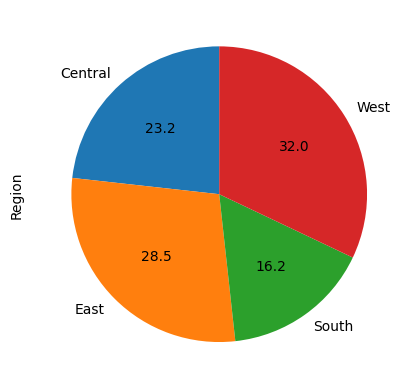

In [70]:
region.plot.pie(subplots=True, autopct="%1.1f", startangle=90)
plt.show()

In [71]:
data_reg = df.groupby(["Region"])[["Sales", "Discount", "Profit"]].mean()
data_reg

,Sales,Discount,Profit
Region,,,
Central,141.627216,0.240353,5.670499
East,148.402750,0.145365,9.609927
South,149.368900,0.147253,11.624859
West,152.462299,0.109335,11.957655


In [72]:
## Profit is more in west region and less in central region 
# Discount is provided more in Central region and  least in west region 

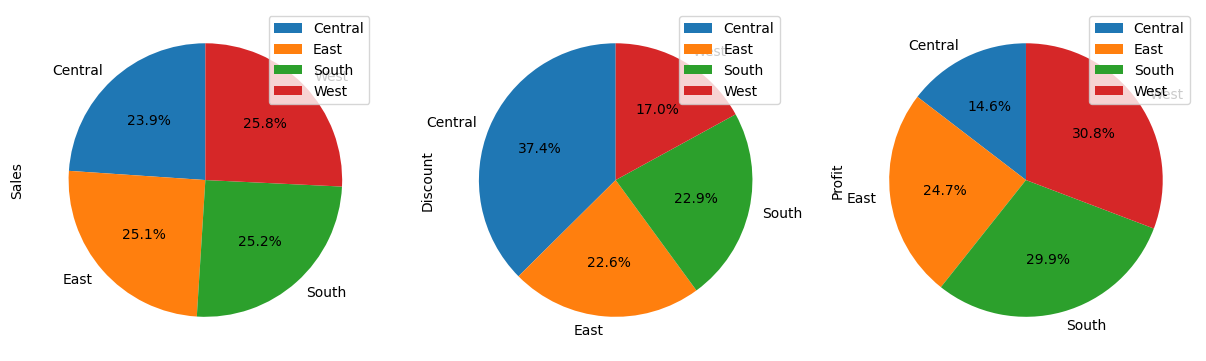

In [73]:
data_reg.plot.pie(subplots=True, figsize=(15,20), autopct="%1.1f%%", startangle=90)
plt.show()

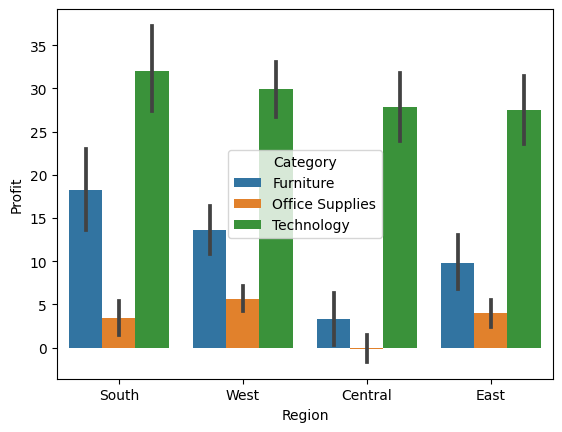

In [74]:
sns.barplot(data=df, x="Region", y="Profit", hue="Category")
plt.show()

In [75]:
#Profit for office supply is least
#Profit for furniture is also low


In [76]:
categ = df["Category"].value_counts().sort_index()
categ

Furniture          2121
Office Supplies    6026
Technology         1847
Name: Category, dtype: int64

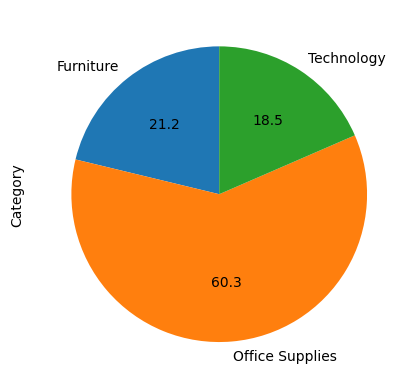

In [77]:
categ.plot.pie(subplots=True, autopct = "%1.1f", startangle=90)
plt.show()

In [78]:
data_categ=df.groupby(["Category"])[["Sales", "Discount", "Profit"]].mean()
data_categ

,Sales,Discount,Profit
Category,,,
Furniture,241.639276,0.173923,10.949004
Office Supplies,85.236682,0.157285,3.446215
Technology,246.785202,0.132323,29.065812


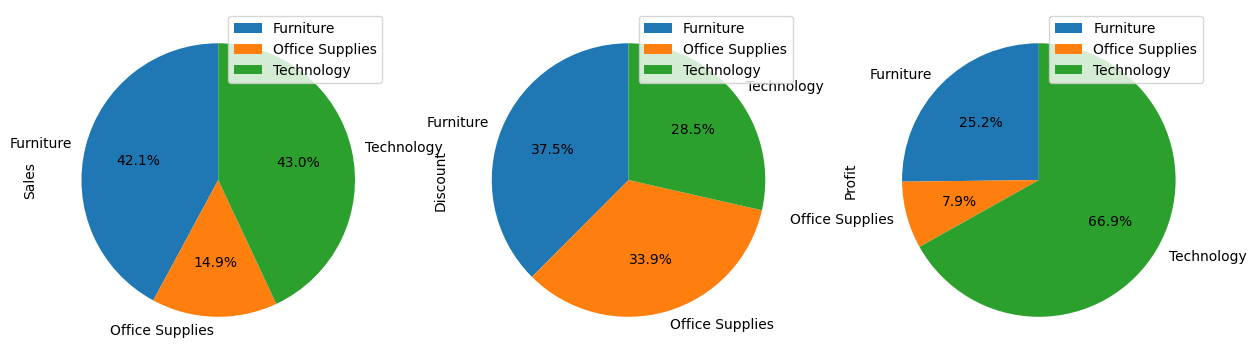

In [79]:
data_categ.plot.pie(subplots=True, figsize=(15,20), autopct="%1.1f%%", startangle=90)
plt.show()

## Analysis of sub-category

In [80]:
categ = df["Sub-Category"].value_counts().sort_index()
categ

Accessories     775
Appliances      466
Art             796
Binders        1523
Bookcases       228
Chairs          617
Copiers          68
Envelopes       254
Fasteners       217
Furnishings     957
Labels          364
Machines        115
Paper          1370
Phones          889
Storage         846
Supplies        190
Tables          319
Name: Sub-Category, dtype: int64

In [81]:
data_subcateg=df.groupby(["Sub-Category"])[["Sales", "Discount", "Profit"]].mean()
data_subcateg

,Sales,Discount,Profit
Sub-Category,,,
Accessories,170.631014,0.078452,24.278113
Appliances,168.452071,0.166524,22.393444
Art,33.390043,0.074874,-8.886688
Binders,69.975475,0.372292,0.922746
Bookcases,333.785415,0.211140,12.815108
Chairs,359.486345,0.170178,21.807324
Copiers,549.311824,0.161765,87.212477
Envelopes,64.741937,0.080315,12.176751
Fasteners,13.936774,0.082028,-13.744459


# Analysis of Quantity

In [82]:
quant = df["Quantity"].value_counts().sort_index()
quant

1      899
2     2402
3     2409
4     1191
5     1230
6      572
7      606
8      257
9      258
10      57
11      34
12      23
13      27
14      29
Name: Quantity, dtype: int64

In [83]:
data_quant=df.groupby(["Quantity"])[["Sales", "Discount", "Profit"]].mean()
data_quant

,Sales,Discount,Profit
Quantity,,,
1,56.889749,0.152959,-6.325892
2,102.622791,0.154858,1.457855
3,138.619019,0.153329,7.471861
4,166.326063,0.157708,11.815924
5,192.305350,0.157146,16.971238
6,204.130427,0.166556,18.819743
7,210.016326,0.161980,23.378966
8,234.459471,0.171595,26.951404
9,255.739012,0.147946,32.611998


In [84]:
data_quant.describe()

,Sales,Discount,Profit
count,14.000000,14.000000,14.000000
mean,209.874621,0.152430,24.289870
std,73.658850,0.022942,17.991429
min,56.889749,0.097059,-6.325892
25%,172.820885,0.152033,13.104753
50%,221.832917,0.156002,23.780297
75%,256.934260,0.160912,32.033572
max,315.448741,0.190702,52.157007


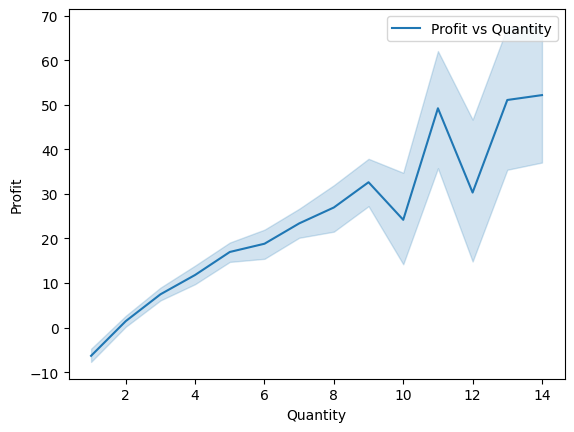

In [85]:
sns.lineplot(x="Quantity", y="Profit",data = df, label="Profit vs Quantity")
plt.show()

In [86]:
# Conclusion: profit increases with Quantity

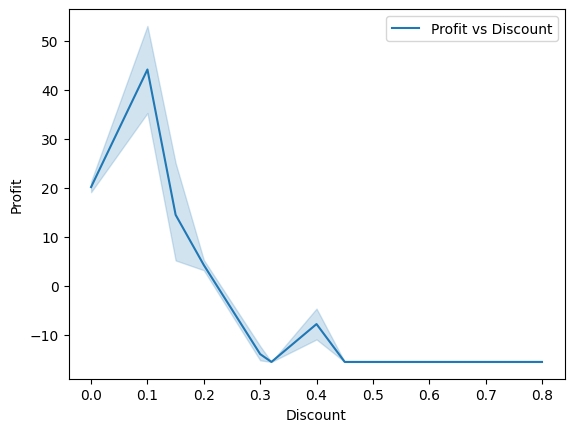

In [87]:
sns.lineplot(x="Discount", y="Profit", data=df, label="Profit vs Discount")
plt.show()

In [88]:
## Conclusion: Profit reduces with increase in Discount 

## Final Conclusion: 
#### Dataset has 9994 records with 13 features. Data set is about US Country, there were no null values present but there were 50 duplicate records and Outliers were present in the dataset. Profit and Discount had negative correlation more than 25% of states dont give Discount State with highest profit  Vermont gives 0 Discount more than 50% count of element from Office Supply but maximum Profit is obtained by Technology west region gives maximum Profit.